In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/Student_Marks.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.shape

(100, 3)

In [4]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [8]:
data.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


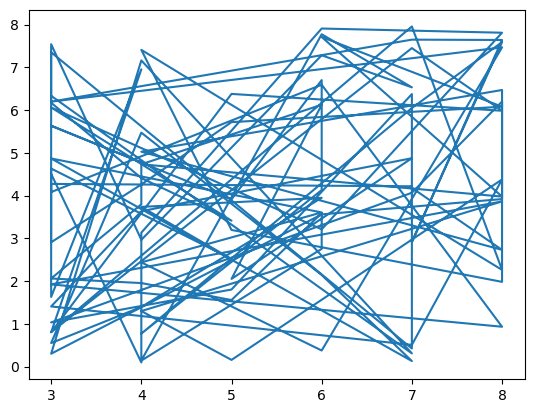

In [9]:
plt.plot(data['number_courses'], data['time_study'])

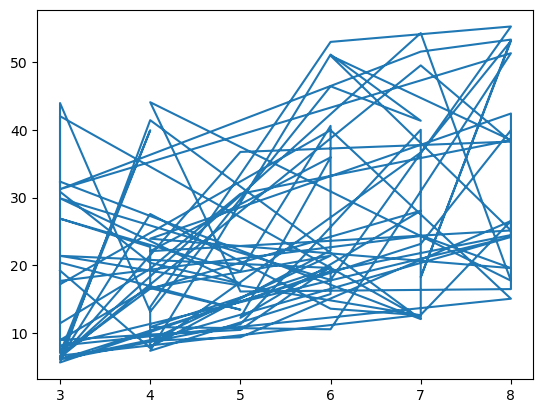

In [10]:
plt.plot(data['number_courses'], data['Marks'])

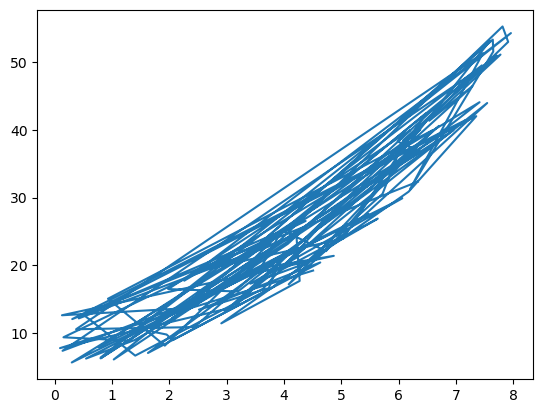

In [11]:
plt.plot(data['time_study'], data['Marks'])

In [12]:
data.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [13]:
X = data.drop('Marks', axis=1)
y = data['Marks']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [20]:
preds = lin_model.predict(X_test)


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_absolute_error(y_test, preds)

2.6744460073130956

In [23]:
d = {'actual':y_test, 'preds':preds}
pd.DataFrame(data=d)

,actual,preds
16,30.548,32.256647
1,7.734,0.848412
43,10.429,10.358733
67,6.185,1.413657
89,40.024,39.360236
21,35.939,36.221461
97,41.444,38.030671
51,22.184,25.719722
6,29.889,30.419712
41,15.725,18.480046


#### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
lin_model = LinearRegression()

In [26]:
mean = []

for d in range(2, 10):
    poly_converter = PolynomialFeatures(degree=d)
    scaled_x_train = poly_converter.fit_transform(X_train)
    scaled_x_test = poly_converter.transform(X_test)
    
    lin_model.fit(scaled_x_train, y_train)
    preds = lin_model.predict(scaled_x_test)
    mean.append(mean_absolute_error(y_test, preds))

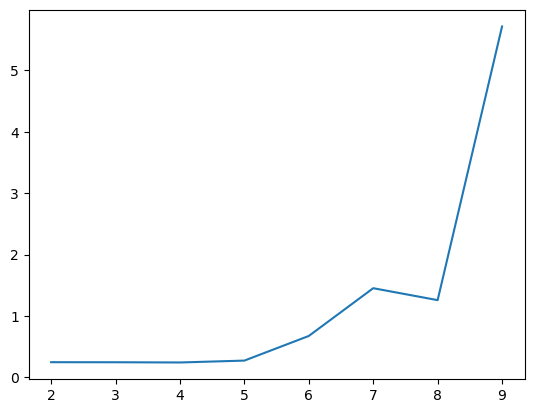

In [27]:
plt.plot(range(2, 10), mean)

In [28]:
poly_converter = PolynomialFeatures(degree=2)
scaled_x_train = poly_converter.fit_transform(X_train)
scaled_x_test = poly_converter.transform(X_test)

lin_model.fit(scaled_x_train, y_train)
preds = lin_model.predict(scaled_x_test)

In [29]:
mean_absolute_error(y_test, preds)

0.24906587796036023

In [30]:
d = {'actual':y_test, 'preds':preds}
pd.DataFrame(data=d)

,actual,preds
16,30.548,31.029411
1,7.734,7.348256
43,10.429,10.693295
67,6.185,5.832392
89,40.024,39.719600
21,35.939,35.954072
97,41.444,41.771887
51,22.184,22.219703
6,29.889,30.286274
41,15.725,15.851614


##### Support Vector Machine

In [31]:
from sklearn.svm import SVR

In [32]:
svr_model = SVR()

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
param_grid = {'kernel':['rbf', 'linear', 'poly'],
             'gamma':['scale', 'auto'],
             'degree':[3, 4, 5]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
grid_model = GridSearchCV(svr_model, param_grid=param_grid)

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)
grid_model.fit(scaled_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'degree': [3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [39]:
preds = grid_model.predict(scaled_x_test)

grid_model.best_params_

{'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

In [40]:
mean_absolute_error(y_test, preds)

4.02238597475486

##### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
tree_model = DecisionTreeRegressor()

In [43]:
param_grid = {'max_features':['auto', 'sqrt', 'log2'],
             'max_depth':[3, 4, 5, 6],
             'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"]}

In [44]:
grid_model = GridSearchCV(tree_model, param_grid=param_grid)

In [45]:
grid_model.fit(X_train, y_train)

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shimu\anaconda3\Lib\site-packages

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [46]:
grid_model.best_params_

{'criterion': 'poisson', 'max_depth': 6, 'max_features': 'sqrt'}

In [47]:
preds = grid_model.predict(scaled_x_test)

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [48]:
mean_absolute_error(y_test, preds)

19.20241111111111

##### Random Forest Tree

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
random_model = RandomForestRegressor()

In [51]:
param_grid = {'n_estimators':[20, 40, 60, 80, 100],
             'max_depth':[2, 3, 4, 5, 6],
             'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
             'bootstrap':[True, False],
             'oob_score':[True, False],
             'min_samples_split':[2, 3, 4, 5]}

In [52]:
grid_model = GridSearchCV(random_model, param_grid=param_grid)

In [53]:
grid_model.fit(X_train, y_train)

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2000 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'oob_score': [True, False]})

In [54]:
preds = grid_model.predict(X_test)

In [55]:
mean_absolute_error(y_test, preds)

1.105812128472219

##### K Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn_model = KNeighborsRegressor()

In [59]:
param_grid = {'n_neighbors':[2, 3, 4, 5],
             'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [60]:
grid_model = GridSearchCV(knn_model, param_grid=param_grid)

In [62]:
grid_model.fit(scaled_x_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [63]:
preds = grid_model.predict(scaled_x_test)

In [64]:
mean_absolute_error(y_test, preds)

1.2574751343139994